In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd 

In [12]:
import os
os.chdir('/content/drive')


In [31]:
insta=pd.read_csv("/content/drive/MyDrive/tb_social_instagram.csv", encoding = "cp949")

In [32]:
insta.head()

,id,channel,keyword,write_date,write_user,content,like_count,comment_count,location_info
0,1,인스타그램,무장애관광,20210420,chungbuk.official,?????네바퀴로 떠나는 충북여행?????\r\n\r\n충북의 아름다움을 누리는데 ...,NaN,1,충청북도청
1,2,인스타그램,무장애관광,20210629,ji__vely_o_o,안녕하세요 여러분 지블리입니다?? ??\r\n오늘은 지난 26일에 다드림조 팀원들과...,NaN,8,NaN
2,3,인스타그램,무장애관광,20210722,ji__vely_o_o,.\r\n안녕하세요:-)지블리입니다 ??\r\n\r\n7월 20일 저희 다드림조는 ...,NaN,7,NaN
3,4,인스타그램,무장애관광,20210611,thesarang33,#카드뉴스 #더사랑\r\n\r\n우리 사회는 관광의 측면뿐만 아니라\r\n사회적으로...,NaN,2,NaN
4,5,인스타그램,무장애관광,20210729,bfc_ggvcyouth,"누구에게나 평등한 도시, 배리어프리 시티\r\n\r\n경기도의 공공시설은 모두에게 ...",NaN,4,NaN


In [33]:
# 키워드 개수, 종류 파악 
list(set(insta['keyword']))

['무장애여행', '무장애숲길', '무장애관광', '휠체어여행', '장애인편의시설', '배리어프리']

In [14]:
stopwords=open("/content/drive/MyDrive/한국어불용어100_.txt",'r',encoding='UTF8')

In [15]:
stop=stopwords.read()

In [16]:
stop=stop.split()
stop_list=[]
for i in range(len(stop)):
  if i%3==0:
    stop_list.append(stop[i])

In [17]:
## <추가 불용어 처리>
stop_list=stop_list+['.','!','ㅠ','?','%','vs','ㅊ',',','/',''  ]# <- 필요없는 단어

In [18]:

def stopword(word_tokenize):
  test=[]
  for w in word_tokenize:
    if w not in stop_list:
      test.append(w)
  return test

In [ ]:
## 명사, 형용사, 부사등 형태소 태그붙여줌

In [19]:

!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 52.8 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [20]:
!pip install collection

  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5117 sha256=d87629eba251c68bdb2c8d2fbeed6267dce5b1fda30adf93ccf8fccfeb7a3e18
  Stored in directory: /root/.cache/pip/wheels/45/ed/3c/29a1c0600bb908a2e7421dc3a3775cbaed434a71b4ed93a439
Successfully built collection


In [55]:
from konlpy.tag import Okt
from collections import Counter

# TEST


In [36]:
moojang_travel=insta[insta['keyword']=='무장애여행']

In [42]:
moojang_travel.reset_index(drop=True, inplace=True)

In [44]:
moojang_travel['content'][0]

"초록여행 셀럽릴레이 19호 'VIP'이상윤 배우\r\n\r\n초록여행을 더 널리 알려 장애인여행 활성화에 힘을 보태기 위한 사회저명인사 응원릴레이 .\r\n★초록여행 셀럽릴레이★\r\n외모, 지성, 성품까지 완벽하신 '상견례 프리패스상'이상윤 배우님께서 19호 주자로 함께하셨습니다!\r\n\r\n유튜브에 '사단법인 그린라이트'를 검색해보세요!\r\n@jwidecompany @lsy_810815\r\n@nara0318\r\n#이상윤 #leesangyoon #vip #kdrama#jangnara #제이와이드 #장나라#드라마 #나정선 #박성준 #VIP #핸섬타이거즈 #초록여행 #셀럽릴레이 #휠체어 #장애인 #나눔 #기부 #장애인여행 #활성화 #여행 #무장애여행 #차량지원 #LeeSangYun #이상윤 #イサンユン #李?允 #李相侖 #Koreanactor #韓?俳優"

In [56]:
Okt = Okt() # -> 자바 환경변수 세팅 필요

# token list에 문장단위로 들어감
token_list =[]

for i in moojang_travel['content']:
  token_list.append(stopword(word_tokenize(i)))

# morphs는 단어뭉치
morphs = []
for sentence in token_list:
  for i in range(len(sentence)):
    morphs.append(Okt.pos(sentence[i]))

In [49]:
#  test 첫줄
token_list=stopword(word_tokenize(moojang_travel['content'][0]))

morphs=[]

for sentence in token_list:
  morphs.append(Okt.pos(sentence))
print(morphs)

[[('초록', 'Noun'), ('여행', 'Noun')], [('셀럽', 'Noun'), ('릴레이', 'Noun')], [('19', 'Number'), ('호', 'Noun')], [("'", 'Punctuation'), ('VIP', 'Alpha'), ("'", 'Punctuation'), ('이상윤', 'Noun')], [('배우', 'Noun')], [('초록', 'Noun'), ('여행', 'Noun'), ('을', 'Josa')], [('널리', 'Noun')], [('알려', 'Verb')], [('장애인', 'Noun'), ('여행', 'Noun')], [('활성화', 'Noun'), ('에', 'Josa')], [('힘', 'Noun'), ('을', 'Josa')], [('보태', 'Noun'), ('기', 'Noun')], [('위', 'Noun'), ('한', 'Josa')], [('사회', 'Noun'), ('저명', 'Noun'), ('인사', 'Noun')], [('응원', 'Noun'), ('릴레이', 'Noun')], [('★', 'Foreign'), ('초록', 'Noun'), ('여행', 'Noun')], [('셀럽', 'Noun'), ('릴레이', 'Noun'), ('★', 'Foreign')], [('외모', 'Noun')], [('지성', 'Noun')], [('성품', 'Noun'), ('까지', 'Josa')], [('완벽하신', 'Adjective')], [("'", 'Punctuation'), ('상견례', 'Noun')], [('프리', 'Noun'), ('패스', 'Noun'), ('상', 'Suffix'), ("'", 'Punctuation'), ('이상윤', 'Noun')], [('배우', 'Noun'), ('님', 'Suffix'), ('께서', 'Josa')], [('19', 'Number'), ('호', 'Noun')], [('주자', 'Noun'), ('로', 'Josa')], [('함께', 'A

In [57]:
## 명사길이가 1이상인 것만 취합
noun_list=[]
for sentence in morphs:
  for word, tag in sentence :
    if tag in ['Noun'] and len(word) > 1:
      noun_list.append(word)

In [58]:
counts = Counter(noun_list)
tags = counts.most_common(40)

In [59]:
!pip install wordcloud

In [60]:
!pip install matplotlib

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [66]:
font_path = '/content/drive/MyDrive/NanumGothic.ttf'

wc = WordCloud(font_path=font_path, background_color="white",width=500, max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('/content/drive/MyDrive/moojang_tracel.jpg')

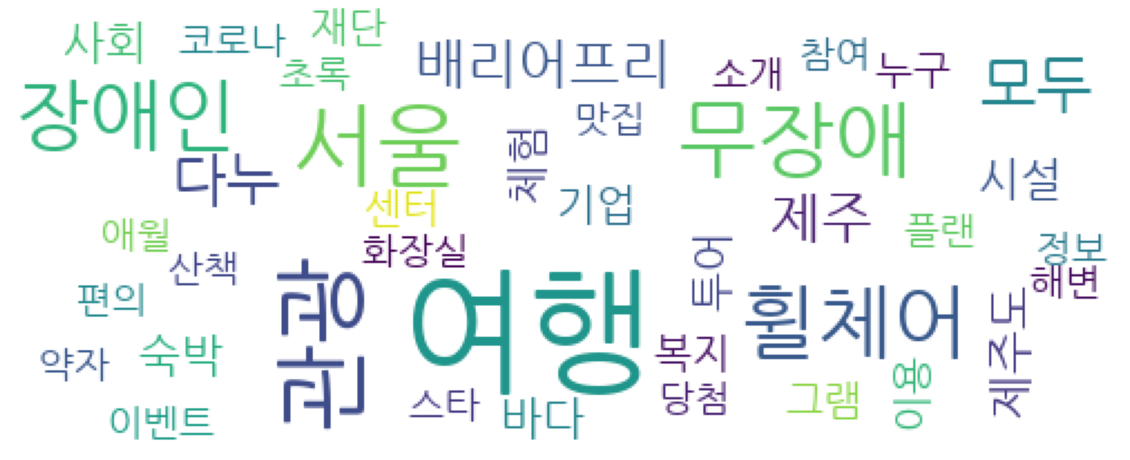

In [67]:
plt.figure(figsize=(20, 10))
plt.imshow(cloud)
# 저장 경로
#plt.savefig(file_name, dpi=300)
plt.axis('off')
plt.show()

In [142]:
# 뺼 단어 : 여행, 그램, 다누


# 최종코드 

from konlpy.tag import Okt

stop_list=stop_list+['.','!','ㅠ','?','%','vs','ㅊ',',','/','여행','그램','다누']# <- 필요없는 단어



def word_cloud(data):

  from konlpy.tag import Okt

  Okt = Okt() # -> 자바 환경변수 세팅 필요


  # token list에 문장단위로 들어감
  token_list =[]

  for i in data:
    token_list.append(stopword(word_tokenize(i)))

  # morphs는 단어뭉치
  morphs = []
  for sentence in token_list:
    for i in range(len(sentence)):
      morphs.append(Okt.pos(sentence[i]))

  # 명사길이가 1이상인 것만 취합
  noun_list =[]

  for sentence in morphs:
    for word, tag in sentence :
      if tag in ['Noun'] and len(word) > 1:
        noun_list.append(word)
  # 빈도 세기       
  counts = Counter(noun_list)
  tags = counts.most_common(40)
  
  # 폰트 지정
  font_path = '/content/drive/MyDrive/NanumGothic.ttf'

  # 워드클라우드 생성
  wc = WordCloud(font_path=font_path, background_color="white",width=500, max_font_size=60)
  cloud = wc.generate_from_frequencies(dict(tags))

  return cloud
  # 생성된 WordCloud를 저장한다.
  # 파일명은 그때그때 바꿔야함
  #cloud.to_file('/content/drive/MyDrive/insta_moojang_travel.jpg'






In [110]:
# insta ->  ['무장애여행', '무장애숲길', '무장애관광', '휠체어여행', '장애인편의시설', '배리어프리'

word_cloud(insta[insta['keyword']=='무장애여행']['content']).to_file('/content/drive/MyDrive/insta_moojang_travel.jpg')
word_cloud(insta[insta['keyword']=='무장애숲길']['content']).to_file('/content/drive/MyDrive/insta_moojang_forest.jpg')
word_cloud(insta[insta['keyword']=='무장애관광']['content']).to_file('/content/drive/MyDrive/insta_moojang_tour.jpg')
word_cloud(insta[insta['keyword']=='휠체어여행']['content']).to_file('/content/drive/MyDrive/insta_wheelchair_travel.jpg')
word_cloud(insta[insta['keyword']=='장애인편의시설']['content']).to_file('/content/drive/MyDrive/insta_Disabled_facilities.jpg')
word_cloud(insta[insta['keyword']=='배리어프리']['content']).to_file('/content/drive/MyDrive/insta_barrier_free.jpg')



In [149]:
sns=pd.read_csv("/content/drive/MyDrive/sns_crawling.csv", encoding = "utf-8")

In [154]:
sns.head()

,content,description,keyword
0,안녕하세요. 호텔스인포 입니다. 오늘 소개해 드릴 호텔은 미국에 위치한 레드 루프 ...,네이버 카페,휠체어여행
1,안녕하세요. 호텔스인포 입니다. 오늘 소개해 드릴 호텔은 미국에 위치한 텍사스 인 ...,네이버 카페,휠체어여행
2,포천의 편리한 위치에 있는 Bears Town에서 여행을 시작해 보세요. 도시의 재...,네이버 블로그,휠체어여행
3,"여행을 좋아하는 당신, 트래블리더 13기의 주인공입니다!\n예비 트래블리더 13기분...",네이버 블로그,무장애여행
4,안녕하세요. 호텔스인포 입니다. 오늘 소개해 드릴 호텔은 미국에 위치한 레드 루프 ...,네이버 카페,휠체어여행


In [155]:
sns[(sns['description']=='다음 블로그') & (sns['keyword']=='무장애여행')]

,content,description,keyword
1176,[광주광역시 서구 – 카페] 커피어반\n\n■ 답사 기준일 :: 2021. 01. ...,다음 블로그,무장애여행
1221,목골산과 삼성산 나들길\n독산고-호압사\n호압사-관악산공원입구\n관악구민방위교육장-...,다음 블로그,무장애여행
1727,[ 전남 화순군 - 여행지 / 문화유적 ] 김삿갓종명지\n■ 답사 기준일 : 202...,다음 블로그,무장애여행
1728,[ 광주 북구 - 여행지 / 자연관광 ] 문화근린공원\n■ 답사 기준일 : 2021...,다음 블로그,무장애여행
1729,2 0 2 1 - 02\n여 ● 행 ● 속 ● 으 ● 로\n 春夏秋冬\nGPS ...,다음 블로그,무장애여행
...,...,...,...
4238,[전남 나주시 - 카페] 버킷114\n■ 답사 기준일 : 2021.08.24.(화)...,다음 블로그,무장애여행
4239,좋아요공감\n공유하기\n글 요소\n저작자표시비영리변경금지\n'유관 단체 소식' 카테...,다음 블로그,무장애여행
4240,"한반도의 중심, 국토 정중앙 강원도 양구는 우리나라 최북단에 위치합니다. 양...",다음 블로그,무장애여행
4305,[뉴스] 속초열린관광지 콘텐츠 홈페이지 개설\n\n승인 2021.08.29 21:1...,다음 블로그,무장애여행


In [156]:
description=list(set(sns['description']))
description

['다음 블로그', '다음 카페', '네이버 카페', '네이버 블로그']

In [157]:
keyword=list(set(sns['keyword']))
keyword

['무장애여행', '무장애숲길', '무장애관광', '휠체어여행', '장애인편의시설', '배리어프리']

In [159]:
for i in description:
  for j in keyword:
    print(i,j)
    word_cloud(sns[(sns['description']==i) & (sns['keyword']==j)]['content']).to_file('/content/drive/MyDrive/'+i+'_'+j+'.jpg')





다음 블로그 무장애여행


KeyboardInterrupt: ignored

In [161]:
word_cloud(sns[(sns['keyword']=='무장애여행')]['content']).to_file('/content/drive/MyDrive/moojang_travel.jpg')
word_cloud(sns[(sns['keyword']=='무장애숲길')]['content']).to_file('/content/drive/MyDrive/moojang_forest.jpg')
word_cloud(sns[(sns['keyword']=='무장애관광')]['content']).to_file('/content/drive/MyDrive/moojang_tour.jpg')
word_cloud(sns[(sns['keyword']=='휠체어여행')]['content']).to_file('/content/drive/MyDrive/wheelchair_travel.jpg')
word_cloud(sns[(sns['keyword']=='장애인편의시설')]['content']).to_file('/content/drive/MyDrive/Disabled_facilities.jpg')
word_cloud(sns[(sns['keyword']=='배리어프리')]['content']).to_file('/content/drive/MyDrive/barrier_free.jpg')


TypeError: ignored

In [165]:
for i in description:
  for j in keyword:
    print(i,j)
    word_cloud(sns[(sns['description']==i) | (sns['keyword']==j)]['content']).to_file('/content/drive/MyDrive/'+i+'_'+j+'.jpg')

다음 블로그 무장애여행


TypeError: ignored